# 載入所需套件

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline

style.use('seaborn')
#設定字體和解決圖像中文顯示問題
plt.rcParams['font.sans-serif']=['Microsoft JhengHei']
plt.rcParams['axes.unicode_minus']=False

# 定義抓取三大法人買賣超金額變化資料函數

In [2]:
def three_party_buy_sell_crawler():
    #爬取近40個交易日三大法人買賣超資料
    url='https://stock.wearn.com/fundthree.asp'
    df=pd.read_html(url)[1]
    df.columns=df.iloc[1,:]
    df=df.iloc[2:,:]

    #將index從民國年轉成西元年
    date=df['日期'].copy()
    for i in range(len(df)):
        date.iloc[i]=date.iloc[i].replace(date.iloc[i][0:3],str(int(date.iloc[i][0:3])+1911))

    df.set_index(pd.to_datetime(date,format='%Y/%m/%d'),inplace=True)
    df=df.iloc[:,1:]
    df.columns=['投信','自營商','外資']
    df.sort_index(inplace=True)
    
    return df

# 定義繪製三大法人買賣超金額變化圖函數

In [3]:
def plot_institutional_investors_net_buy(title):
    overbuy=df[df[title].str.startswith('+')][title].str.strip('+').astype(float)
    oversell=df[df[title].str.startswith('-')][title].str.strip('-').astype(float)*(-1)
    data=overbuy.append(oversell).sort_index()
    positive=data>0
    
    fig,ax=plt.subplots(1,figsize=(20,10))
    ax=data.plot(kind='bar',color=positive.map({True:'r',False:'g'}),edgecolor='k')
    ax.set_xlabel(None)
    ax.set_xticklabels(data.index.format(formatter=lambda x:x.strftime('%Y-%m-%d')),fontsize=11)
    ax.set_title('{}  近40個交易日買賣超金額變化圖 (單位:億元)'.format(title),fontsize=20)
    ax.axhline(y=0,color='k',linestyle='-')
    ax.tick_params(axis='y',labelsize=12)
    ax.tick_params(axis='x',labelsize=10)
    
    plt.savefig('近40個交易日{}買賣超金額變化圖.png'.format(title))
    plt.show()

# 抓取三大法人買賣超金額變化資料

In [4]:
df=three_party_buy_sell_crawler()
df.head()

,投信,自營商,外資
日期,,,
2020-05-07,+ 9.41,+ 1.41,- 18.13
2020-05-08,+ 5.05,+ 11.44,- 41.06
2020-05-11,+ 7.71,- 2.88,+ 28.13
2020-05-12,+ 4.02,- 10.48,- 250.93
2020-05-13,+ 8.56,+ 4.80,- 47.60


# 將近40個交易日三大法人買賣超金額變化資料匯出成Excel檔

In [5]:
df.to_excel('近40個交易日三大法人買賣超金額變化資料.xlsx')

# 繪製近40個交易日外資買賣超金額變化圖

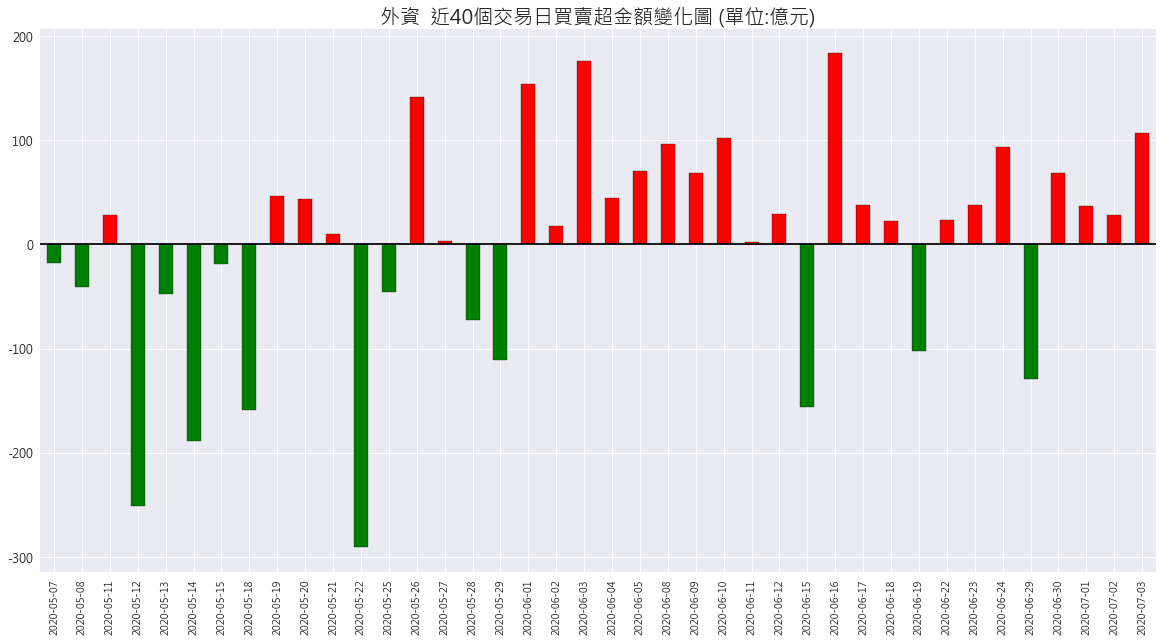

In [6]:
plot_institutional_investors_net_buy('外資')

# 繪製近40個交易日投信買賣超金額變化圖

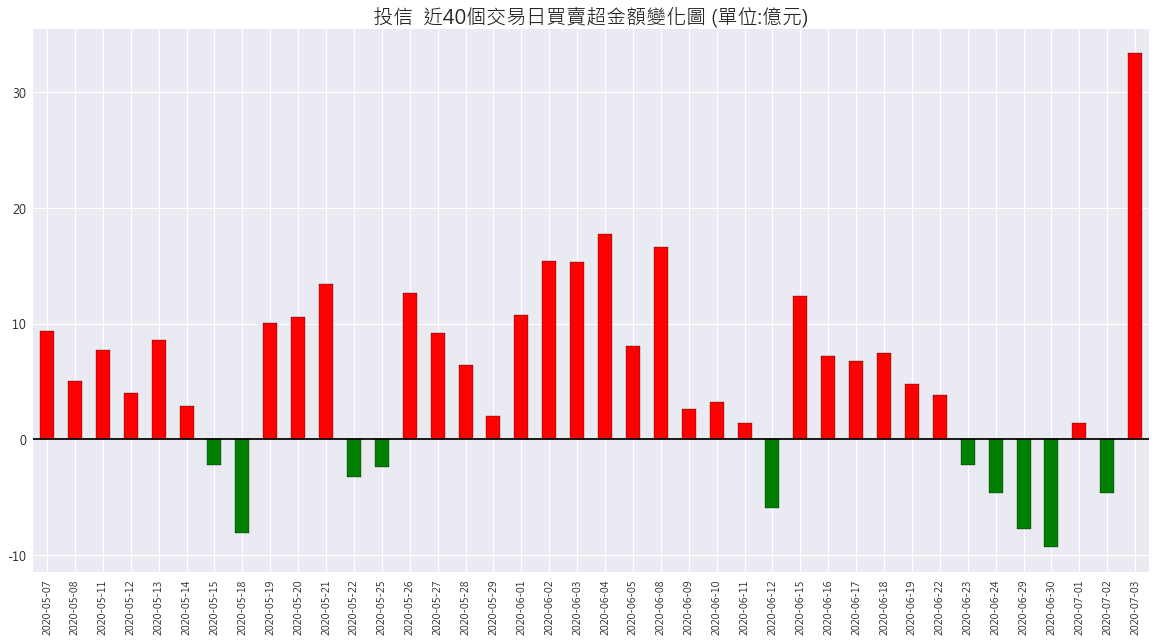

In [7]:
plot_institutional_investors_net_buy('投信')

# 繪製近40個交易日自營商買賣超金額變化圖

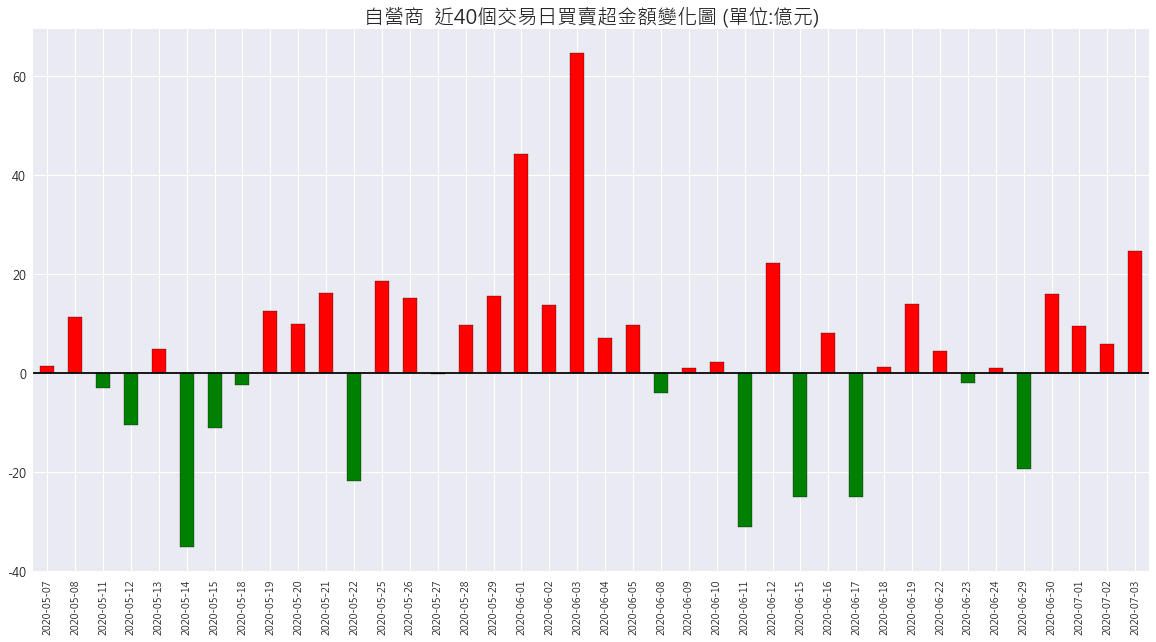

In [8]:
plot_institutional_investors_net_buy('自營商')